# Source model interface

`icecube_tools` has a simple source modelling interface built in that we demonstrate here.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from icecube_tools.source.flux_model import PowerLawFlux, BrokenPowerLawFlux
from icecube_tools.source.source_model import PointSource, DiffuseSource

## Spectral shape

We start by defining a spectral shape, such as a power law or broken power law. Let's start with the definition of a simple power law flux.

In [2]:
# Parameters of power law flux
flux_norm = 1e-18  # Flux normalisation in units of GeV^-1 cm^-2 s^-1 (sr^-1)
norm_energy = 1e5  # Energy of normalisation in units of GeV
spectral_index = 2.0  # Assumed negative slope
min_energy = 1e4  # GeV
max_energy = 1e8  # GeV

# Instantiate
power_law = PowerLawFlux(flux_norm, norm_energy, spectral_index, min_energy, max_energy)

Text(0, 0.5, 'F $[GeV^-1 cm^-2 s^-1 (sr^-1)]$')

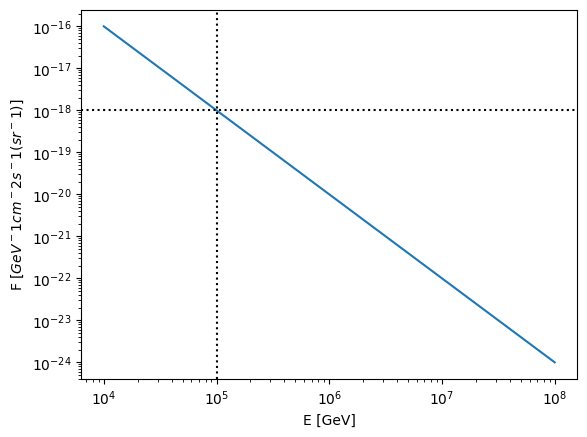

In [3]:
energies = np.geomspace(min_energy, max_energy)

fig, ax = plt.subplots()
ax.plot(energies, [power_law.spectrum(e) for e in energies])
ax.axhline(flux_norm, color="k", linestyle=":")
ax.axvline(norm_energy, color="k", linestyle=":")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("E [GeV]")
ax.set_ylabel("F $[GeV^-1 cm^-2 s^-1 (sr^-1)]$")

We can also use the `PowerLawFlux` class to perform some simple calculations, such as integration of the flux.

In [4]:
total_flux = power_law.integrated_spectrum(min_energy, max_energy)  # cm^-2 s^-1 (sr^-1)
total_flux

array([9.999e-13])

In [5]:
total_energy_flux = power_law.total_flux_density()  # GeV cm^-2 s^-1 (sr^-1)
total_energy_flux

9.210340371976183e-08

Sampling from the power law shape is also possible:

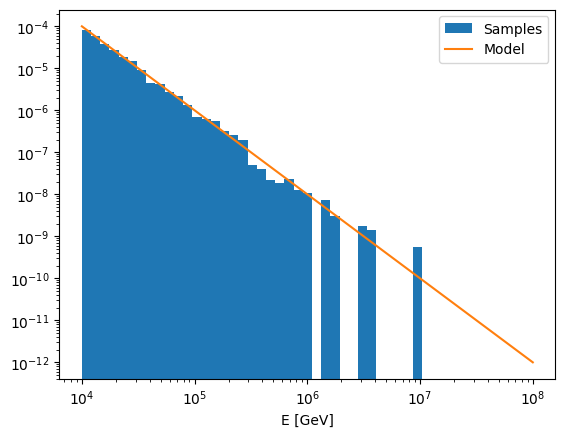

In [6]:
samples = power_law.sample(1000)

fig, ax = plt.subplots()
ax.hist(samples, bins=energies, density=True, label="Samples")
ax.plot(energies, [power_law.spectrum(e) / total_flux for e in energies], label="Model")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("E [GeV]")
ax.legend()

The `BrokenPowerLaw` class is also available and behaves in a very similar way.

## Diffuse and point sources

Once the spectral shape is defined, we can specify either a `DiffuseSource` or a `PointSource`. It is assumed that diffuse sources are isotropic and the flux model describes the per-steradian flux over the entire $4\pi$ sky. We also specify a redshift of the source such that adiabatic neutrino energy losses can be accounted for. Naturally, `PointSource` objects also have a direction specified in (ra, dec) coordinates.

In [7]:
diffuse_source = DiffuseSource(power_law, z=0.0)

ra = np.deg2rad(50)
dec = np.deg2rad(-10)
point_source = PointSource(power_law, z=0.5, coord=(ra, dec))

The original flux model can now be accessed from within the source along with its other properties:

In [8]:
diffuse_source.flux_model

Sources and lists of sources can be used as input to simulations, as demonstrated in the simulation notebook.